# Predator-Prey 
**Author: Gavin DeBrun**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from dataclasses import field
from copy import copy
from  matplotlib.animation import FuncAnimation
import matplotlib
from IPython.display import HTML

matplotlib.rcParams['animation.embed_limit'] = 2**128

def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','scipy','scipy.optimize']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return

## 1: Solving the predatory-prey differential equations

In [2]:
resetMe() ##Leave me here
def Step(B, F, time, params):
  alpha = params["alpha"]
  beta = params["beta"]
  delta = params["delta"]
  gamma = params["gamma"]
  dt = params["dt"]

  new_B = B + (alpha*B - beta*F*B)*dt
  new_F = F + (delta*F*B - gamma*F)*dt
  new_time = time + dt

  return new_B, new_F, new_time

def Eco(params):
  bunnies = []
  initialBunnies = params["B"]
  bunnies.append(initialBunnies)

  foxes = []
  initialFoxes = params["F"]
  foxes.append(initialFoxes)

  times = []
  initialTime = params["initialTime"]
  times.append(initialTime)

  T = params["runtime"]
  dt = params["dt"]

  for i in range(0, int(round(T/dt)), 1):
    new_B, new_F, new_time = Step(bunnies[i], foxes[i], times[i], params)
    bunnies.append(new_B)
    foxes.append(new_F)
    times.append(new_time)
  return np.array(bunnies), np.array(foxes), np.array(times)

### b. Building Plots

$\alpha=1.0$, $\beta=0.005$, $\gamma=0.6$ and $D=0.003$.  Use a timestep $dt=0.01$


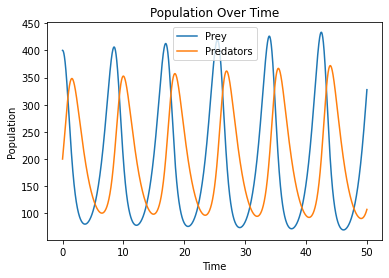

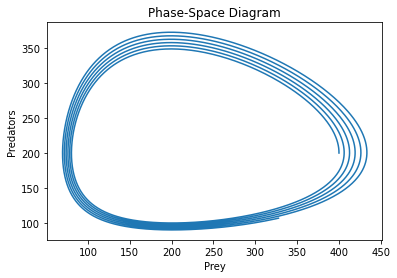

In [3]:
params = dict()
params["alpha"] = 1.0
params["beta"] = .005
params["gamma"] = .6
params["delta"] = .003
params["dt"] = .01
params["runtime"] = 50
params["initialTime"] = 0
params["B"] = 400
params["F"] = 200
bunnies,foxes,times = Eco(params)
plt.plot(times, bunnies, label = "Prey")
plt.plot(times, foxes, label = "Predators")
plt.title("Population Over Time")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.show()
plt.plot(bunnies, foxes)
plt.title("Phase-Space Diagram")
plt.xlabel("Prey")
plt.ylabel("Predators")
plt.show()

### c.  Predator Phase Space Plots

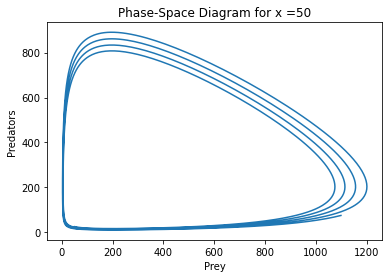

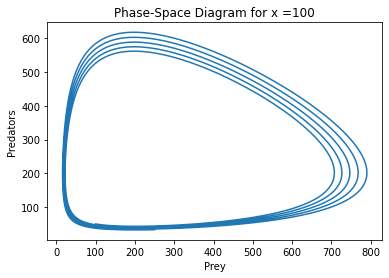

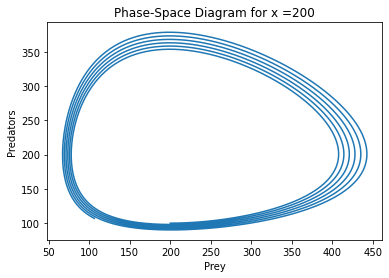

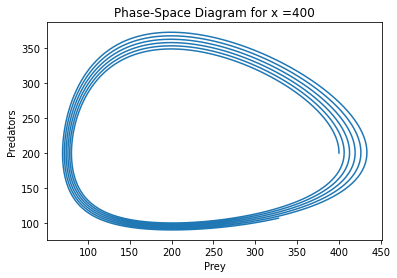

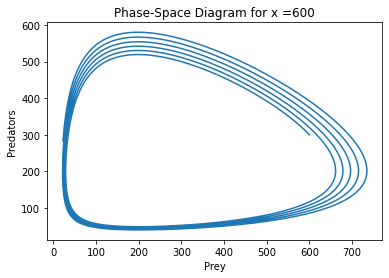

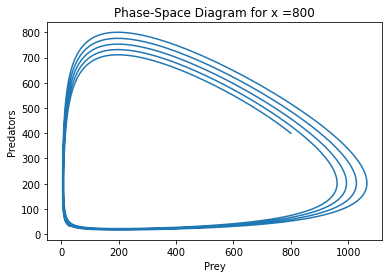

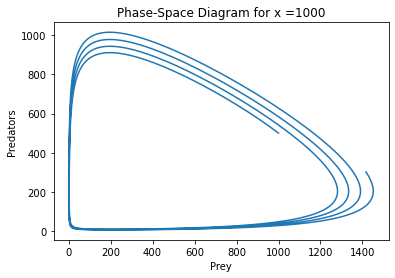

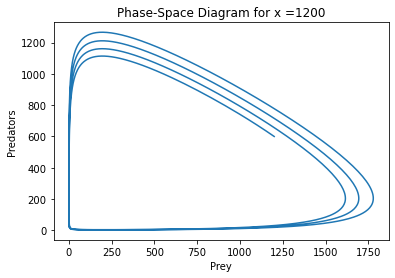

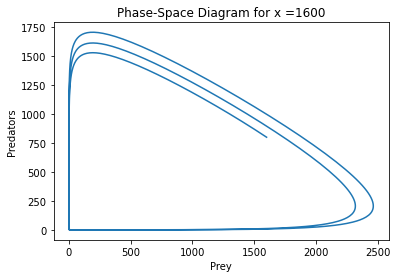

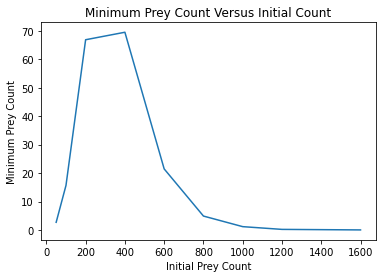

In [4]:
startingPrey = []
minimumPrey = []
for i in range(0,4,1):
  params["B"] = 50*2**i
  startingPrey.append(params["B"])
  params["F"] = (50*2**i)/2
  bunnies, foxes, times = Eco(params)
  plt.plot(bunnies,foxes)
  plt.xlabel("Prey")
  plt.ylabel("Predators")
  plt.title("Phase-Space Diagram for x =" + str(params["B"]))
  plt.show()
  min = bunnies.min()
  #print(min, params["B"])
  minimumPrey.append(min)
for i in range(0,6,1):
  if (i == 4):
    continue
  params["B"] = 600 + 200*i
  startingPrey.append(params["B"])
  params["F"] = (600 + 200*i)/2
  bunnies, foxes, times = Eco(params)
  plt.plot(bunnies,foxes)
  plt.xlabel("Prey")
  plt.ylabel("Predators")
  plt.title("Phase-Space Diagram for x =" + str(params["B"]))
  plt.show()
  min = bunnies.min()
  #print(min, params["B"])
  minimumPrey.append(min)

plt.plot(startingPrey, minimumPrey)
plt.xlabel("Initial Prey Count")
plt.ylabel("Minimum Prey Count")
plt.title("Minimum Prey Count Versus Initial Count")
plt.show()

### d. Stationary points

The number of prey is: 600.0 and the number of predators is: 200.0


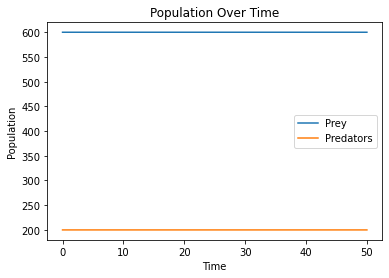

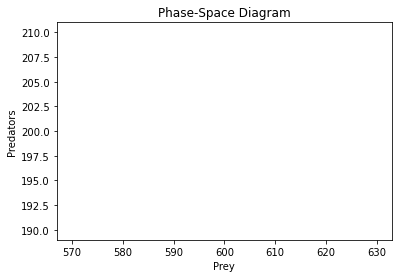

In [6]:
import scipy.optimize
params["delta"] = .001

def getDeviation(initial_population):
  params["B"] = initial_population[0]
  params["F"] = initial_population[1]
  bunnies, foxes, times = Eco(params)
  return np.std(bunnies)

out=scipy.optimize.minimize(getDeviation, np.array([100,100]))
print("The number of prey is:", round(out.x[0]), "and the number of predators is:", round(out.x[1]))

params["B"] = round(out.x[0])
params["F"] = round(out.x[1])
bunnies,foxes,times = Eco(params)
plt.plot(times, bunnies, label = "Prey")
plt.plot(times, foxes, label = "Predators")
plt.title("Population Over Time")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()
plt.plot(bunnies, foxes)
plt.title("Phase-Space Diagram")
plt.xlabel("Prey")
plt.ylabel("Predators")
plt.show()

## 2: Stochasticity in Predator-Prey equations

### a.  The first bunny

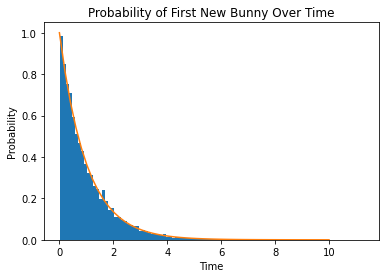

In [7]:
def TimeOfFirstBunny(alpha,deltaT):
  t = 0
  dt = deltaT
  for i in range(0, 1000000000000, 1):
    t += dt
    if np.random.random() < alpha*dt:
      break
  return t



alpha= 1
deltaT=0.01
times = []
for i in range(0, 10000):
  time = TimeOfFirstBunny(alpha, deltaT)
  times.append(time)
plt.hist(times,100,density=1)
plt.plot(np.linspace(0,10), alpha*np.exp(-alpha*np.linspace(0,10)))
plt.xlabel("Time")
plt.ylabel("Probability")
plt.title("Probability of First New Bunny Over Time")
plt.show()


### b. A faster algorithm

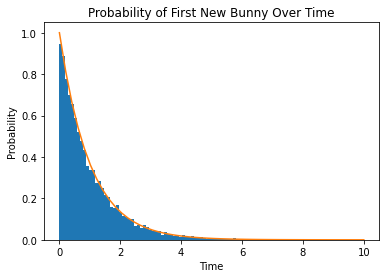

In [8]:
def TimeOfFirstBunny2(alpha,deltaT):
    t = - np.log(np.random.random())/alpha
    return t

alpha=1
deltaT=0.01
times = []
for i in range(0,10000):
  time = TimeOfFirstBunny2(alpha, deltaT)
  times.append(time)
plt.hist(times,100,density=1)
plt.plot(np.linspace(0,10), alpha*np.exp(-alpha*np.linspace(0,10)))
plt.xlabel("Time")
plt.ylabel("Probability")
plt.title("Probability of First New Bunny Over Time")
plt.show()


### c. Continuous time markov chain

In [9]:
def StochasticStep(B, F, time, params):
  alpha = params["alpha"]
  beta = params["beta"]
  delta = params["delta"]
  gamma = params["gamma"]

  bunnies = B
  foxes = F

  times = []
  reproduce = -np.log(np.random.random())/(alpha*B)
  times.append(reproduce)
  die = -np.log(np.random.random())/(gamma*F)
  times.append(die)
  eaten = -np.log(np.random.random())/(beta*F*B)
  times.append(eaten)
  eat = -np.log(np.random.random())/(delta*F*B)
  times.append(eat)
  min = np.array(times).min()

  if min == reproduce:
    bunnies +=1
  elif min == die:
    foxes -= 1
  elif min == eaten:
    bunnies -=1
  elif min == eat:
    foxes += 1
  return bunnies, foxes, time + min

def RunEcosystem(params):
  T = params["runtime"]
  dt = params["dt"]
  bunnies = []
  initialBunnies = params["B"]
  bunnies.append(initialBunnies)
  foxes = []
  initialFoxes = params["F"]
  foxes.append(initialFoxes)
  times = []
  initialTime = params["initialTime"]
  times.append(initialTime)

  for i in range(0, 9999999999999):
    new_bunnies, new_foxes, new_time = StochasticStep(bunnies[i], foxes[i], times[i], params)
    if (new_bunnies <= 0 or new_foxes <= 0 or new_time >=T):
      break
    bunnies.append(new_bunnies)
    foxes.append(new_foxes)
    times.append(new_time)
  return np.array(bunnies), np.array(foxes), np.array(times)

### d.  Stochastic Populations

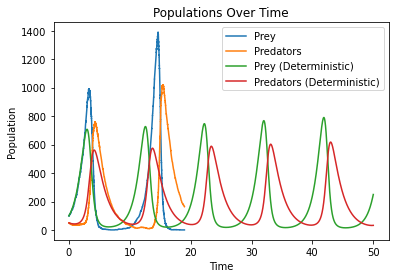

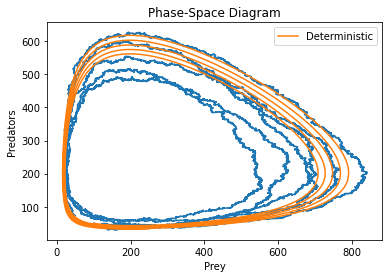

In [10]:
params["runtime"] = 50
params["B"] = 100
params["F"] = 50
params["alpha"] = 1
params["beta"] = .005
params["gamma"] = .6
params["delta"] = .003
params["dt"] = .01

bunnies, foxes, times = RunEcosystem(params)
plt.plot(times, bunnies, label = "Prey")
plt.plot(times, foxes, label = "Predators")
bunnies, foxes, times = Eco(params)
plt.plot(times, bunnies, label = "Prey (Deterministic)")
plt.plot(times, foxes, label = "Predators (Deterministic)")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Populations Over Time")
plt.legend()
plt.show()

bunnies, foxes, times = RunEcosystem(params)
plt.plot(bunnies, foxes)
bunnies, foxes, times = Eco(params)
plt.plot(bunnies, foxes, label = "Deterministic")
plt.title("Phase-Space Diagram")
plt.xlabel("Prey")
plt.ylabel("Predators")
plt.legend()
plt.show()

### e. Stationary again

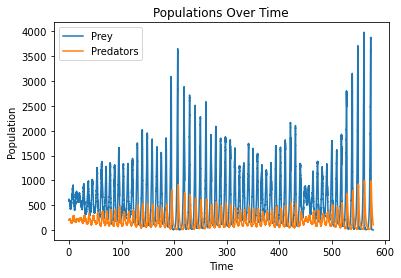

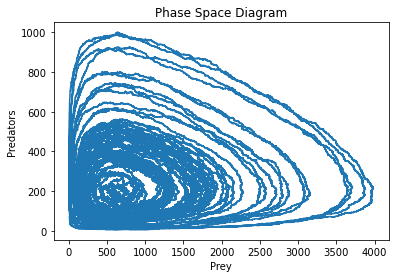

In [11]:
params["delta"] = .001
params["runtime"] = 1000
params["B"] = 600
params["F"] = 200
bunnies, foxes, times = RunEcosystem(params)

plt.plot(times, bunnies, label = "Prey")
plt.plot(times, foxes, label = "Predators")
plt.title("Populations Over Time")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot()
plt.show()

plt.plot(bunnies, foxes)
plt.title("Phase Space Diagram")
plt.xlabel("Prey")
plt.ylabel("Predators")
plt.show()

### e. Extinction


* $\alpha=1.0$
* $\beta=0.008$
* $\gamma=0.3$
* $D=0.002$

In [ ]:
%%time
params["alpha"] = 1.0
params["beta"] = .008
params["gamma"] = .3
params["delta"] = .002
params["T"] = 9999999999999999999
populationSizes = np.arange(20,600,1)
last_times = []
for i in populationSizes:
  params["F"] = i
  params["B"] = i
  bunnies, foxes, times = RunEcosystem(params)
  last_times.append(times[len(times) -1])

plt.plot(populationSizes,last_times)
plt.title("Time Until Extinction Event For Different Initial Population Sizes")
plt.xlabel("Initial Population")
plt.ylabel("Time Until Extinction Event")
plt.show()

### f. Window Averaging (cleaning data)

In [ ]:
# taken from https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def running_mean(x, N):  
    '''given data x and window length N, compute running mean'''
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
new_times = running_mean(last_times, 20)
plt.plot(running_mean(populationSizes, 20), new_times)
plt.title("Time Until Extinction Event For Varying Population Sizes")
plt.ylabel("Time")
plt.xlabel("Initial Population")
plt.show()